### You are an exceptionnal baker. You live in the greater Chicago area. You ought to open a bakery.

# But where?

In [1]:
answer = 'Let\'s find out together!'

In [2]:
print(answer)

Let's find out together!


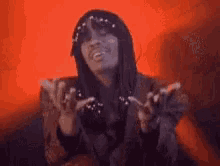